In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string
string.punctuation
import re
import math
import json
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data= pd.read_json('/media/maruf/DataStorage/Data/scm/Gift_Cards.json', lines=True)

In [3]:
data = data.drop(['reviewerName', 'vote','style', 'image'], axis= 1)

In [4]:
data.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0        1     False  12 19, 2008   APV13CM0919JD  B001GXRQW0   
1        5     False  12 17, 2008  A3G8U1G1V082SN  B001GXRQW0   
2        5     False  12 17, 2008   A11T2Q0EVTUWP  B001GXRQW0   
3        5     False  12 17, 2008   A9YKGBH3SV22C  B001GXRQW0   
4        1      True  12 17, 2008  A34WZIHVF3OKOL  B001GXRQW0   

                                          reviewText  \
0  Amazon,\nI am shopping for Amazon.com gift car...   
1  I got this gift card from a friend, and it was...   
2  aren't we going to save trees?! :) People who ...   
3  You can always get someone something from Amaz...   
4  Why take 50 dollars of good money with no limi...   

                                             summary  unixReviewTime  
0                                   Merry Christmas.      1229644800  
1                      Gift card with best selection      1229472000  
2  A convenient and great gift for the environmen...      1229472000  
3                                 Totally make sense      1229472000  
4                                         Give CASH!      1229472000

In [5]:
data.asin.unique

<bound method Series.unique of 0         B001GXRQW0
1         B001GXRQW0
2         B001GXRQW0
3         B001GXRQW0
4         B001GXRQW0
             ...    
147189    B01H5PPJT4
147190    B01H5PPJT4
147191    B01H5PPJT4
147192    B01H5PPJT4
147193    B01H5PPJT4
Name: asin, Length: 147194, dtype: object>

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147194 entries, 0 to 147193
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         147194 non-null  int64 
 1   verified        147194 non-null  bool  
 2   reviewTime      147194 non-null  object
 3   reviewerID      147194 non-null  object
 4   asin            147194 non-null  object
 5   reviewText      147035 non-null  object
 6   summary         147154 non-null  object
 7   unixReviewTime  147194 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 8.0+ MB
None


In [7]:
from nltk import FreqDist
def freq_words(x, terms = 10):
  all_words = ''.join([str(text) for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 10 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

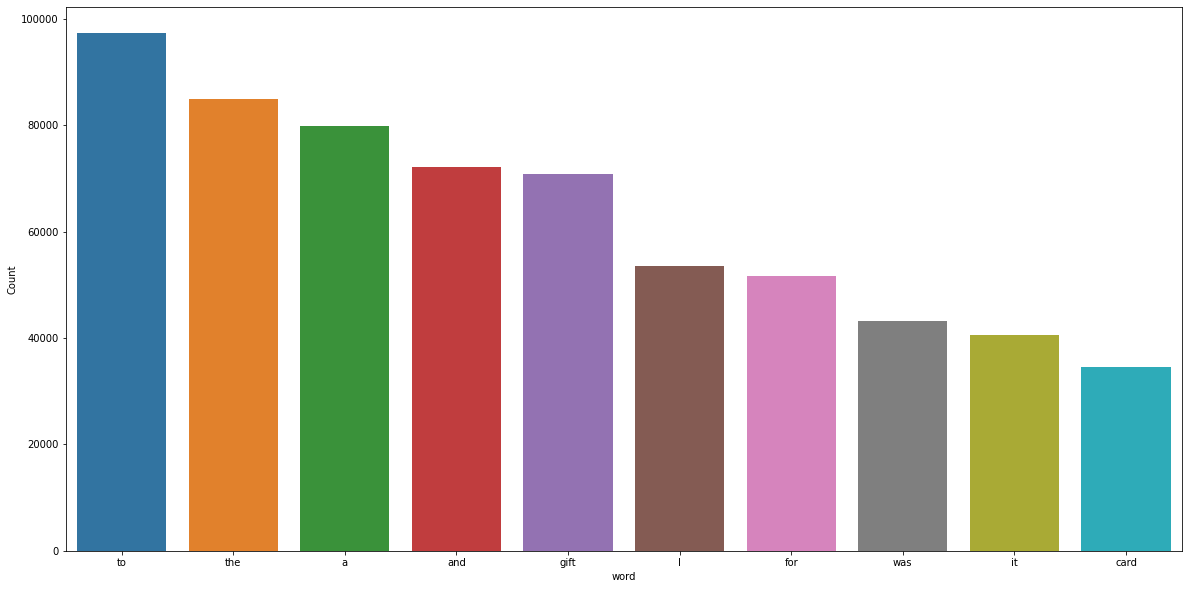

In [8]:
freq_words(data['reviewText'])

In [11]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/maruf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
def expand_constraction(text):
    for key in contractions:
        value = contractions[key]
        text = str(text).replace(key, value)
    return text
data['aexpand_constract'] = data['reviewText'].apply(lambda x:expand_constraction(x))

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/maruf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/maruf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def remove_punctuation(text):
    punctuationfree = "". join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree
data['bclean_msg'] = data['aexpand_constract'].apply(lambda x:remove_punctuation(x))

In [22]:
def remove_newlines_tabs(text):
    formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com').replace('zz','').replace('zzz','')
    return formatted_text
data['cremovetabs_msg'] = data['bclean_msg'].apply(lambda x:remove_newlines_tabs(x))

In [23]:

data['dlower_msg'] = data['cremovetabs_msg'].apply(lambda x: x.lower())

In [24]:
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
data['emsg_token']= data['dlower_msg'].apply(lambda x: tokenization(x))

In [25]:
from nltk.corpus import stopwords, wordnet
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
data['fno_stopwords']= data['emsg_token'].apply(lambda x:remove_stopwords(x))

In [26]:
pd.set_option('display.max_colwidth', -1)
data['fno_stopwords']

0         [amazon, shopping, amazoncom, gift, cards, christmas, gifts, really, disappointed, five, choices, one, says, merry, christmas, mentions, christmas, sure, alone, wanting, card, reflects, actual, holiday, celebrating, principle, cannot, send, amazon, gift, card, christmas, whats, political, correctness, bad, marketing, decision, lynn]                                                                                                                                                      
1         [got, gift, card, friend, best, site, much, choose, great, gift]                                                                                                                                                                                                                                                                                                                                                                                                                                    
2         

In [27]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['fno_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

In [28]:
pd.set_option('display.max_colwidth', -1)
data['lemmatized']

0         [amazon, shopping, amazoncom, gift, card, christmas, gift, really, disappointed, five, choice, one, say, merry, christmas, mention, christmas, sure, alone, wanting, card, reflects, actual, holiday, celebrating, principle, cannot, send, amazon, gift, card, christmas, whats, political, correctness, bad, marketing, decision, lynn]                                                                                                                                                 
1         [got, gift, card, friend, best, site, much, choose, great, gift]                                                                                                                                                                                                                                                                                                                                                                                                                          
2         [going, save, tree, 

In [29]:
data_new = data[['asin', 'lemmatized', 'overall']]

In [87]:
data_new

asin  \
0       B001GXRQW0   
1       B001GXRQW0   
2       B001GXRQW0   
3       B001GXRQW0   
4       B001GXRQW0   
...            ...   
147189  B01H5PPJT4   
147190  B01H5PPJT4   
147191  B01H5PPJT4   
147192  B01H5PPJT4   
147193  B01H5PPJT4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        lemmatized  \
0       [amazon, shopping, amazoncom, gift, card, christmas, gift, really, disappointed, five, choice, one, say, merry, christmas, mention, christmas, sure, alone, wanting, card, reflects, actual, holiday, celebrating, principle, cannot, send, amazon, gift, card, christmas, whats, political, correctness, bad, marketing, decision, lynn]                                                                                                                                                    
1       [got, gift, card, friend, best, site, much, choose, great, gift]                                                                                                                                                                                                                                                                                                                                                                                                                             
2       [going, save, tree, people, complaining, paper, gift, card, simply, buy, electronic, gift, card, via, email, convenient, indeed, great, gift, found, paper, gift, card, annoying, since, always, wonder, much, money, got, left, lose, lose, electronic, delivery, gift, card, make, lot, easier, redeem, need, copypaste, code, gift, certificate, balance, shall, whenever, want, use, sent, friend, electronic, gift, card, via, email, newborn, wedding, housewarming, happy, holiday]   
3       [always, get, someone, something, amazon, safety, net, return, like, returning, thing, hassle, card, take, care, thatno, return, hassle]                                                                                                                                                                                                                                                                                                                                                     
4       [take, 50, dollar, good, money, limitation, turn, amazon, money, used, site, benefit, also, spend, time, headache, buying, type, card, dealing, activation, issue, risking, expiration, delivery, issue, keep, keep, track, much, remaining, card, least, give, discount, committing, purchasing, power]                                                                                                                                                                                     
...                                                                                                                                                                                                                                                                                                          ...                                                                                                                                                                                     
147189  [always, enjoy, getting, gift, card, via, email, lowes, home, improvement, simple, easy, effective, right, time, ]                                                                                                                                                                                                                                 

In [30]:
data_new.isnull()

asin  lemmatized  overall
0       False  False       False  
1       False  False       False  
2       False  False       False  
3       False  False       False  
4       False  False       False  
...       ...    ...         ...  
147189  False  False       False  
147190  False  False       False  
147191  False  False       False  
147192  False  False       False  
147193  False  False       False  

[147194 rows x 3 columns]

In [89]:
data_new.loc[data_new['asin'] == 'B01H5PPJT4']

asin  \
135995  B01H5PPJT4   
135996  B01H5PPJT4   
135997  B01H5PPJT4   
135998  B01H5PPJT4   
135999  B01H5PPJT4   
...            ...   
147189  B01H5PPJT4   
147190  B01H5PPJT4   
147191  B01H5PPJT4   
147192  B01H5PPJT4   
147193  B01H5PPJT4   

                                                                                                                                                        lemmatized  \
135995  [worked, great, received, gift, card, via, email, le, five, minute, used, gift, card, immediately, lowescom, problem, would, definitely, purchase]           
135996  [order, 2, gift, card, without, issue, received, card, within, minute, placing, order, 2, minute, top, problem, using, either, card, definitely]             
135997  [lowes, honor, gift, card, local, lowes, store, told, gift, card, purchased, amazon, invalid, told, several, people, ripped, one, poor, lady, ripped, 500]   
135998  [hey, let, order, physical, card, either, way, manage, site]                                                                                                 
135999  [wrong, always, show, amazon, smile, egift, card, picture, review, click, check, button, turn, amazon, smile, egift, card, click, edit, final, check]        
...                                                                                                                                                       ...        
147189  [always, enjoy, getting, gift, card, via, email, lowes, home, improvement, simple, easy, effective, right, time, ]                                           
147190  [worked, great]                                                                                                                                              
147191  [gift, card]                                                                                                                                                 
147192  [say, gift, card]                                                                                                                                            
147193  [complaint, ordered, within, 5, minute, received, email, containing, egift, card]                                                                            

        overall  
135995  5        
135996  5        
135997  1        
135998  1        
135999  1        
...    ..        
147189  5        
147190  4        
147191  5        
147192  5        
147193  5        

[295 rows x 3 columns]

In [31]:
freq_words(data['lemmatized'])

In [34]:
tfv=TfidfVectorizer(ngram_range=(0,4))

X = tfv.fit_transform(data['lemmatized'].apply(lambda x: np.str_(x)))


In [35]:
feature_names = tfv.get_feature_names()
# for col in response.nonzero()[1]:
#     print (feature_names[col], ' - ', response[0, col])
TffeatureData = pd.DataFrame(tfv.idf_,index=tfv.get_feature_names(),columns=['weights'])
TffeatureData.sort_values(by=['weights'])

weights
                           1.000000 
gift                       1.682195 
card                       2.036906 
gift card                  2.287769 
great                      2.720138 
...                             ... 
fix find nothing help      12.206366
fix find nothing           12.206366
fix find                   12.206366
fix frankly crap           12.206366
zyxel wap4205 also allows  12.206366

[2090031 rows x 1 columns]

In [96]:
import pickle
pickle.dump(tfv, open("tfv_stop.pkl", "wb"))
df_idf.to_pickle("dtm_stop.pkl")

In [97]:
data_pickle = pd.read_pickle('dtm_stop.pkl')
data_pickle

idf_weights
10th   11.107754  
14th   12.206366  
20th   12.206366  
21st   12.206366  
30th   11.513219  
...          ...  
yummi  11.290076  
yummm  12.206366  
yuppi  12.206366  
zaxbi  11.800901  
zumba  12.206366  

[7812 rows x 1 columns]

In [99]:
from gensim import matutils, models
import scipy.sparse

In [100]:
tdm = data_pickle.transpose()
tdm.head()

10th       14th       20th       21st       30th       40th  \
idf_weights  11.107754  12.206366  12.206366  12.206366  11.513219  12.206366   

                   4th       50th        5th       60th  ...        ypu  \
idf_weights  12.206366  10.260456  12.206366  10.501618  ...  12.206366   

                  yr      yrold       yuan      yukki      yummi      yummm  \
idf_weights  10.0663  12.206366  12.206366  12.206366  11.290076  12.206366   

                 yuppi      zaxbi      zumba  
idf_weights  12.206366  11.800901  12.206366  

[1 rows x 7812 columns]

In [101]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(df_idf)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [102]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("tfv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [103]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.000*"devil" + 0.000*"scour" + 0.000*"footnot" + 0.000*"fianc" + 0.000*"domin" + 0.000*"costum" + 0.000*"nabi" + 0.000*"chrimbu" + 0.000*"feeridden" + 0.000*"hurryturn"'),
 (1,
  '0.000*"saya" + 0.000*"pomeranian" + 0.000*"purplish" + 0.000*"nearest" + 0.000*"geeeee" + 0.000*"chrome" + 0.000*"yellowgold" + 0.000*"dispos" + 0.000*"ti" + 0.000*"velveti"'),
 (2,
  '0.000*"amazonfr" + 0.000*"propan" + 0.000*"llne" + 0.000*"tammi" + 0.000*"insteadterr" + 0.000*"herselfth" + 0.000*"ooompf" + 0.000*"worm" + 0.000*"mainstream" + 0.000*"ef"')]